In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward_difference(func, x, h, dtype):
    return (func(x + h, dtype=dtype) - func(x, dtype=dtype)) / h

def central_difference(func, x, h, dtype):
    return (func(x + h, dtype=dtype) - func(x - h, dtype=dtype)) / (2*h)

def extrapolated_difference(func, x, h, dtype):
    f1 = lambda x,h: (func(x + h, dtype=dtype) - func(x - h, dtype=dtype)) / (2*h)
    f2 = lambda x,h: (func(x + 2*h, dtype=dtype) - func(x - 2*h, dtype=dtype)) / (4*h)
    return (4*f1(x,h) - f2(x,h)) / 3

def total_error_true(h,x,func,method):
    if func=='cos':
        if method=='forward':
            return np.abs(-np.sin(x, dtype=np.float32) - forward_difference(np.cos, x, h, dtype=np.float32), dtype=np.float32)
        if method=='central':
            return np.abs(-np.sin(x, dtype=np.float32) - central_difference(np.cos, x, h, dtype=np.float32), dtype=np.float32)
        if method=='extrapolated':
            return np.abs(-np.sin(x, dtype=np.float32) - extrapolated_difference(np.cos, x, h, dtype=np.float32), dtype=np.float32)
    if func=='exp':
        if method=='forward':
            return np.abs(np.exp(x, dtype=np.float32) - forward_difference(np.exp, x, h, dtype=np.float32), dtype=np.float32)
        if method=='central':
            return np.abs(np.exp(x, dtype=np.float32) - central_difference(np.exp, x, h, dtype=np.float32), dtype=np.float32)
        if method=='extrapolated':
            return np.abs(np.exp(x, dtype=np.float32) - extrapolated_difference(np.exp, x, h, dtype=np.float32), dtype=np.float32)

def total_error(h,x,func,method):
    machine_error = np.float32(1e-7)
    if func=='cos':
        if method=='forward':
            return h*(np.abs(-np.cos(x, dtype=np.float32), dtype=np.float32))/2 + machine_error*(np.abs(np.cos(x, dtype=np.float32), dtype=np.float32)/h)
        if method=='central':
            return (h**2)*(np.abs(np.sin(x, dtype=np.float32), dtype=np.float32))/6 + machine_error*(np.abs(np.cos(x, dtype=np.float32), dtype=np.float32)/h)
        if method=='extrapolated':
            return (h**4)*(np.abs(-np.sin(x, dtype=np.float32), dtype=np.float32))*3/120 + machine_error*(np.abs(np.cos(x, dtype=np.float32), dtype=np.float32)/h)
    if func=='exp':
        if method=='forward':
            return h*(np.abs(np.exp(x, dtype=np.float32), dtype=np.float32))/2 + machine_error*np.abs(np.exp(x, dtype=np.float32), dtype=np.float32)/h
        if method=='central':
            return (h**2)*(np.abs(np.exp(x, dtype=np.float32), dtype=np.float32))/6 + machine_error*np.abs(np.exp(x, dtype=np.float32), dtype=np.float32)/h
        if method=='extrapolated':
            return (h**4)*(np.abs(np.exp(x, dtype=np.float32), dtype=np.float32))*3/120 + machine_error*np.abs(np.exp(x, dtype=np.float32), dtype=np.float32)/h

In [3]:
print(forward_difference(np.cos, 0.1, h=np.sqrt(1e-7, dtype=np.float32), dtype=np.float32))
print(central_difference(np.cos, 0.1, h=np.power(1e-7, 2/3, dtype=np.float32), dtype=np.float32))
print(extrapolated_difference(np.cos, 0.1, h=np.power(1e-7, 3/5, dtype=np.float32), dtype=np.float32))

print(forward_difference(np.cos, 10, h=np.sqrt(1e-7, dtype=np.float32), dtype=np.float32))
print(central_difference(np.cos, 10, h=np.power(1e-7, 2/3, dtype=np.float32), dtype=np.float32))
print(extrapolated_difference(np.cos, 10, h=np.power(1e-7, 3/5, dtype=np.float32), dtype=np.float32))

print(-np.sin(0.1))
print(-np.sin(10))

-0.1000863
-0.09959772
-0.099584006
0.54472584
0.554704
0.5427131
-0.09983341664682815
0.5440211108893698


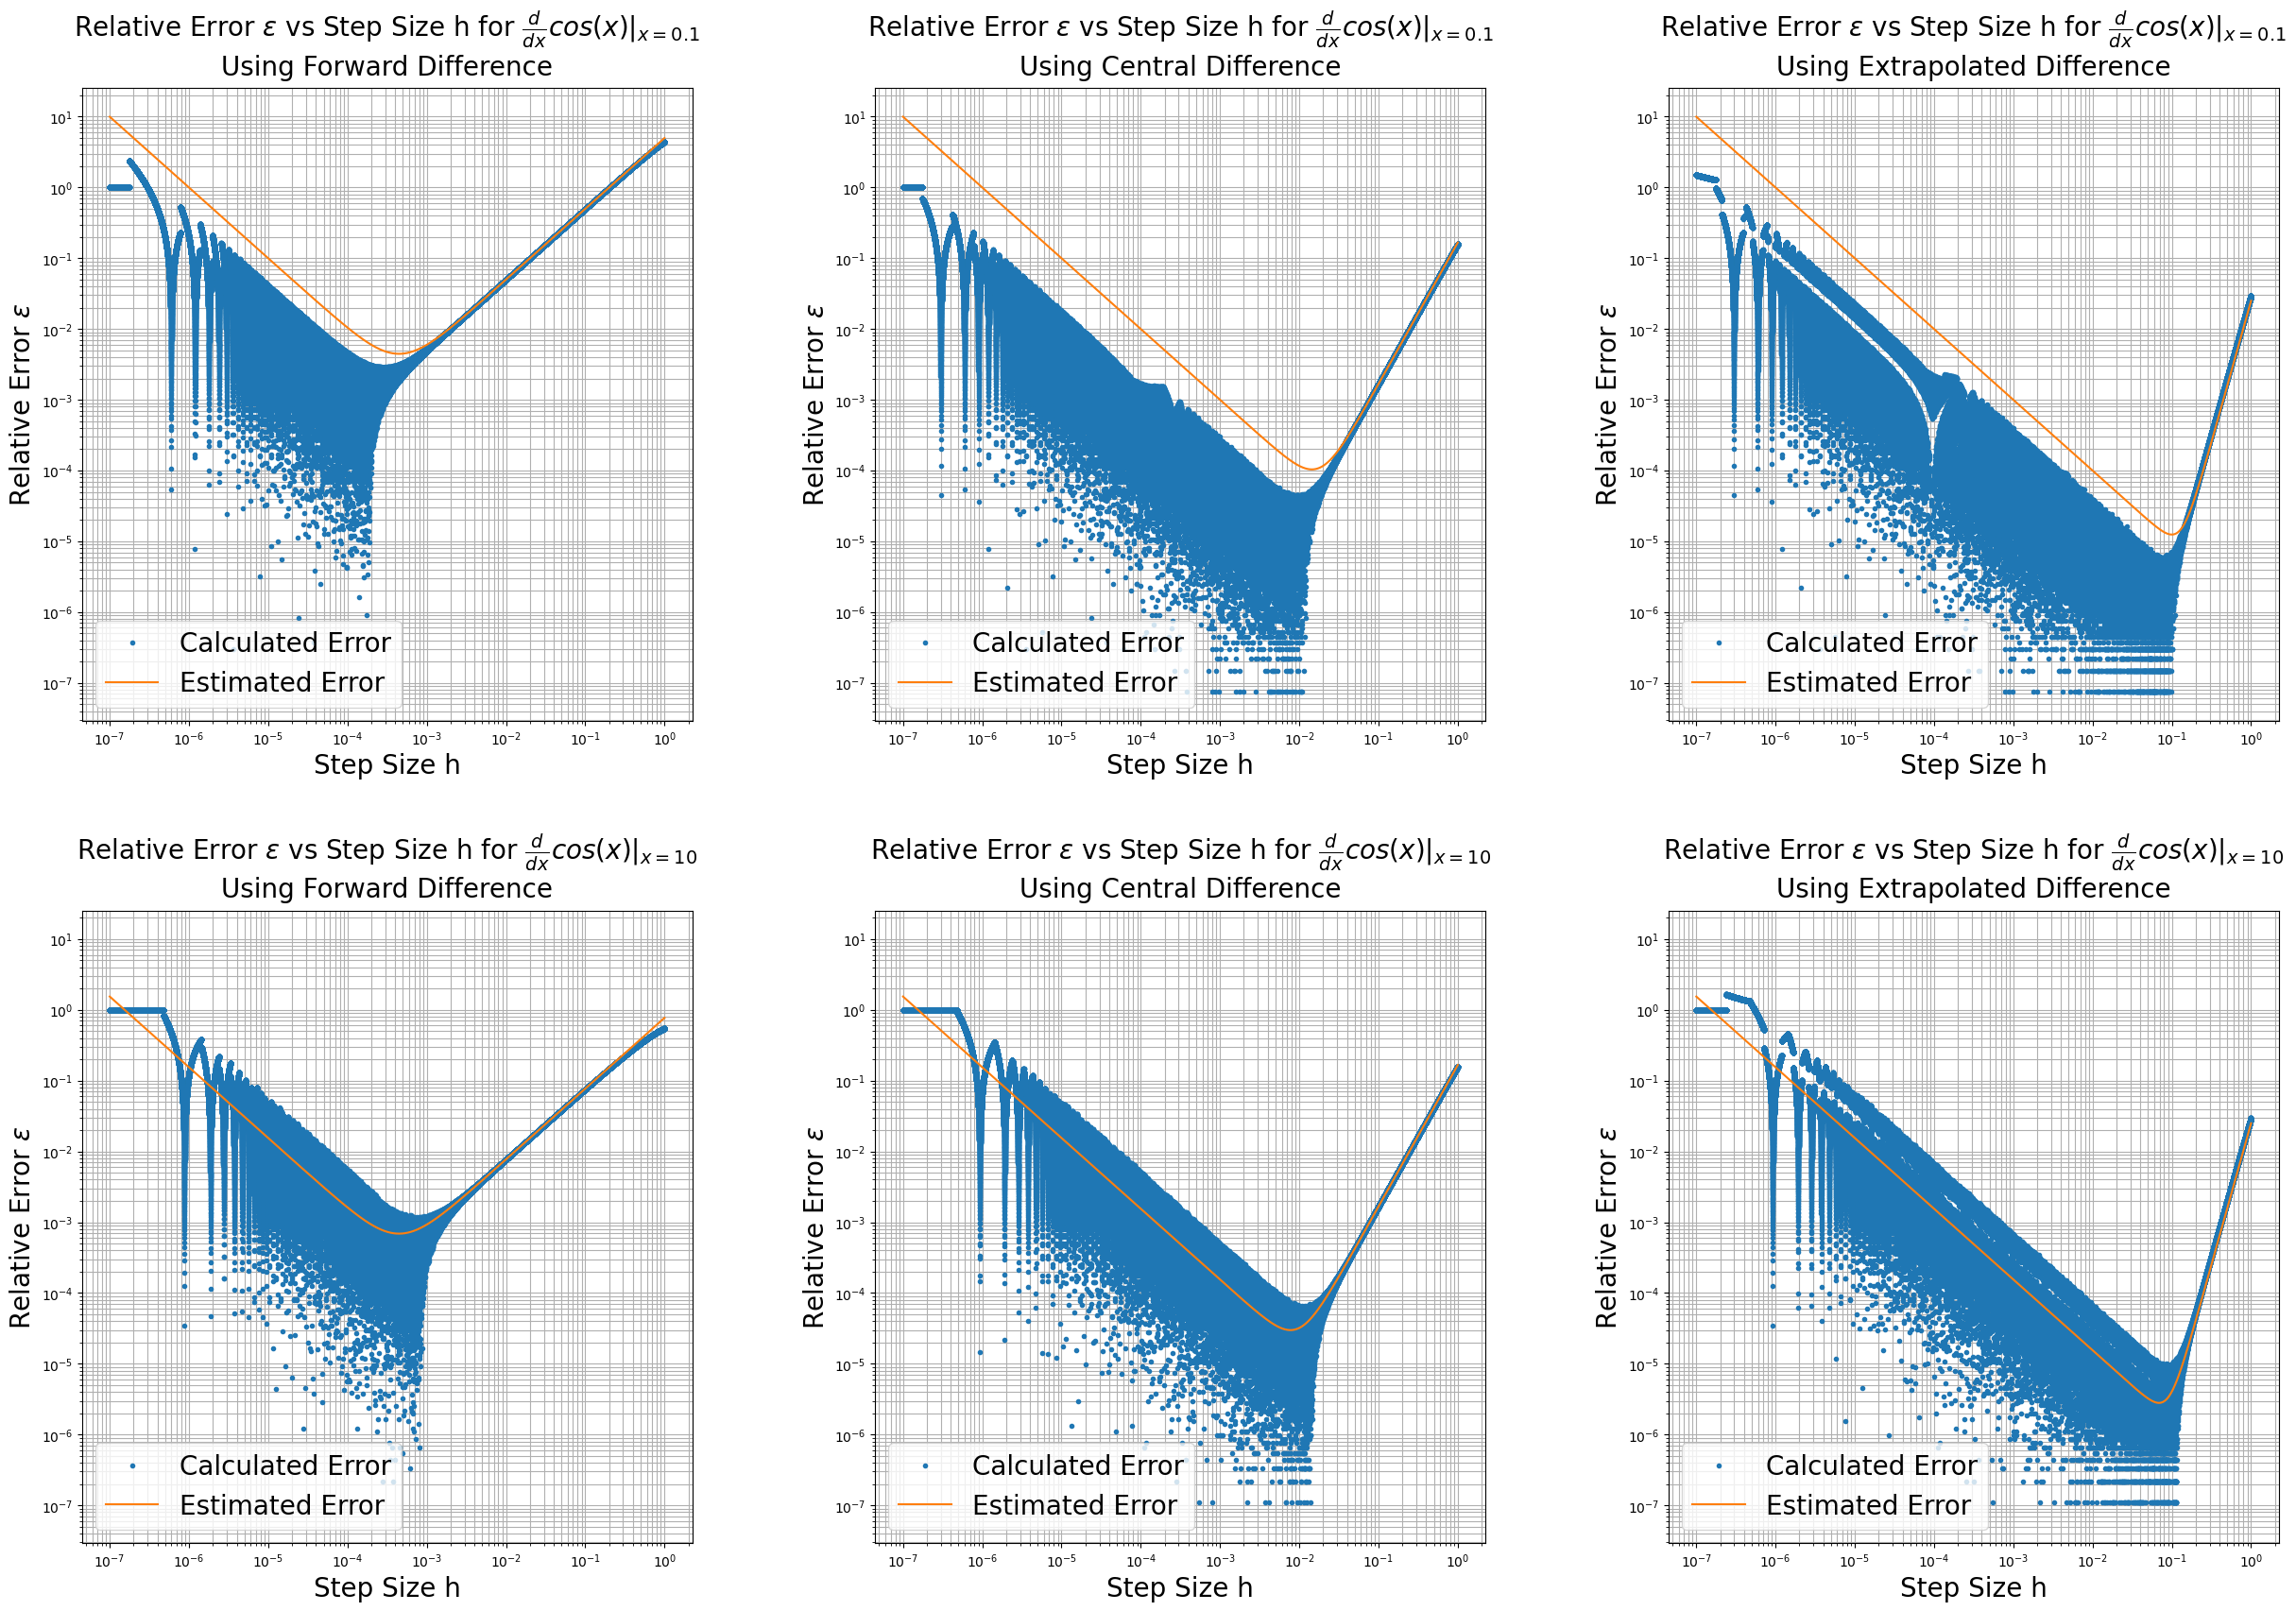

<Figure size 800x600 with 0 Axes>

In [6]:
h_array = np.logspace(-7,0,int(1e5),dtype=np.float32)

fig, ax = plt.subplots(2,3,figsize=(30, 20),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.figure(figsize=(8,6),dpi=100)
ax[0][0].loglog(h_array,total_error_true(h_array, 0.1, 'cos', 'forward')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][0].loglog(h_array,total_error(h_array, 0.1, 'cos', 'forward')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Estimated Error')
ax[0][0].grid(True,which='both')
ax[0][0].set_xlabel('Step Size h',fontsize=20)
ax[0][0].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[0][0].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} cos(x)|_{x=0.1}$'+ '\nUsing Forward Difference',fontsize=20,pad=10)
ax[0][0].legend(fontsize=20,loc='lower left')
ax[0][0].tick_params(labelbottom=True)
ax[0][0].tick_params(labelleft=True)

ax[0][1].loglog(h_array,total_error_true(h_array, 0.1, 'cos', 'central')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][1].loglog(h_array,total_error(h_array, 0.1, 'cos', 'central')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Estimated Error')
ax[0][1].grid(True,which='both')
ax[0][1].set_xlabel('Step Size h',fontsize=20)
ax[0][1].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[0][1].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} cos(x)|_{x=0.1}$'+ '\nUsing Central Difference',fontsize=20,pad=10)
ax[0][1].legend(fontsize=20,loc='lower left')
ax[0][1].tick_params(labelbottom=True)
ax[0][1].tick_params(labelleft=True)

ax[0][2].loglog(h_array,total_error_true(h_array, 0.1, 'cos', 'extrapolated')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][2].loglog(h_array,total_error(h_array, 0.1, 'cos', 'extrapolated')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Estimated Error')
ax[0][2].grid(True,which='both')
ax[0][2].set_xlabel('Step Size h',fontsize=20)
ax[0][2].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[0][2].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} cos(x)|_{x=0.1}$'+ '\nUsing Extrapolated Difference',fontsize=20,pad=10)
ax[0][2].legend(fontsize=20,loc='lower left')
ax[0][2].tick_params(labelbottom=True)
ax[0][2].tick_params(labelleft=True)

ax[1][0].loglog(h_array,total_error_true(h_array, 10, 'cos', 'forward')/np.abs(-np.sin(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][0].loglog(h_array,total_error(h_array, 10, 'cos', 'forward')/np.abs(-np.sin(10,dtype=np.float32)),label='Estimated Error')
ax[1][0].grid(True,which='both')
ax[1][0].set_xlabel('Step Size h',fontsize=20)
ax[1][0].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[1][0].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} cos(x)|_{x=10}$'+ '\nUsing Forward Difference',fontsize=20,pad=10)
ax[1][0].legend(fontsize=20,loc='lower left')
ax[1][0].tick_params(labelbottom=True)
ax[1][0].tick_params(labelleft=True)

ax[1][1].loglog(h_array,total_error_true(h_array, 10, 'cos', 'central')/np.abs(-np.sin(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][1].loglog(h_array,total_error(h_array, 10, 'cos', 'central')/np.abs(-np.sin(10,dtype=np.float32)),label='Estimated Error')
ax[1][1].grid(True,which='both')
ax[1][1].set_xlabel('Step Size h',fontsize=20)
ax[1][1].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[1][1].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} cos(x)|_{x=10}$'+ '\nUsing Central Difference',fontsize=20,pad=10)
ax[1][1].legend(fontsize=20,loc='lower left')
ax[1][1].tick_params(labelbottom=True)
ax[1][1].tick_params(labelleft=True)

ax[1][2].loglog(h_array,total_error_true(h_array, 10, 'cos', 'extrapolated')/np.abs(-np.sin(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][2].loglog(h_array,total_error(h_array, 10, 'cos', 'extrapolated')/np.abs(-np.sin(10,dtype=np.float32)),label='Estimated Error')
ax[1][2].grid(True,which='both')
ax[1][2].set_xlabel('Step Size h',fontsize=20)
ax[1][2].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[1][2].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} cos(x)|_{x=10}$'+ '\nUsing Extrapolated Difference',fontsize=20,pad=10)
ax[1][2].legend(fontsize=20,loc='lower left')
ax[1][2].tick_params(labelbottom=True)
ax[1][2].tick_params(labelleft=True)




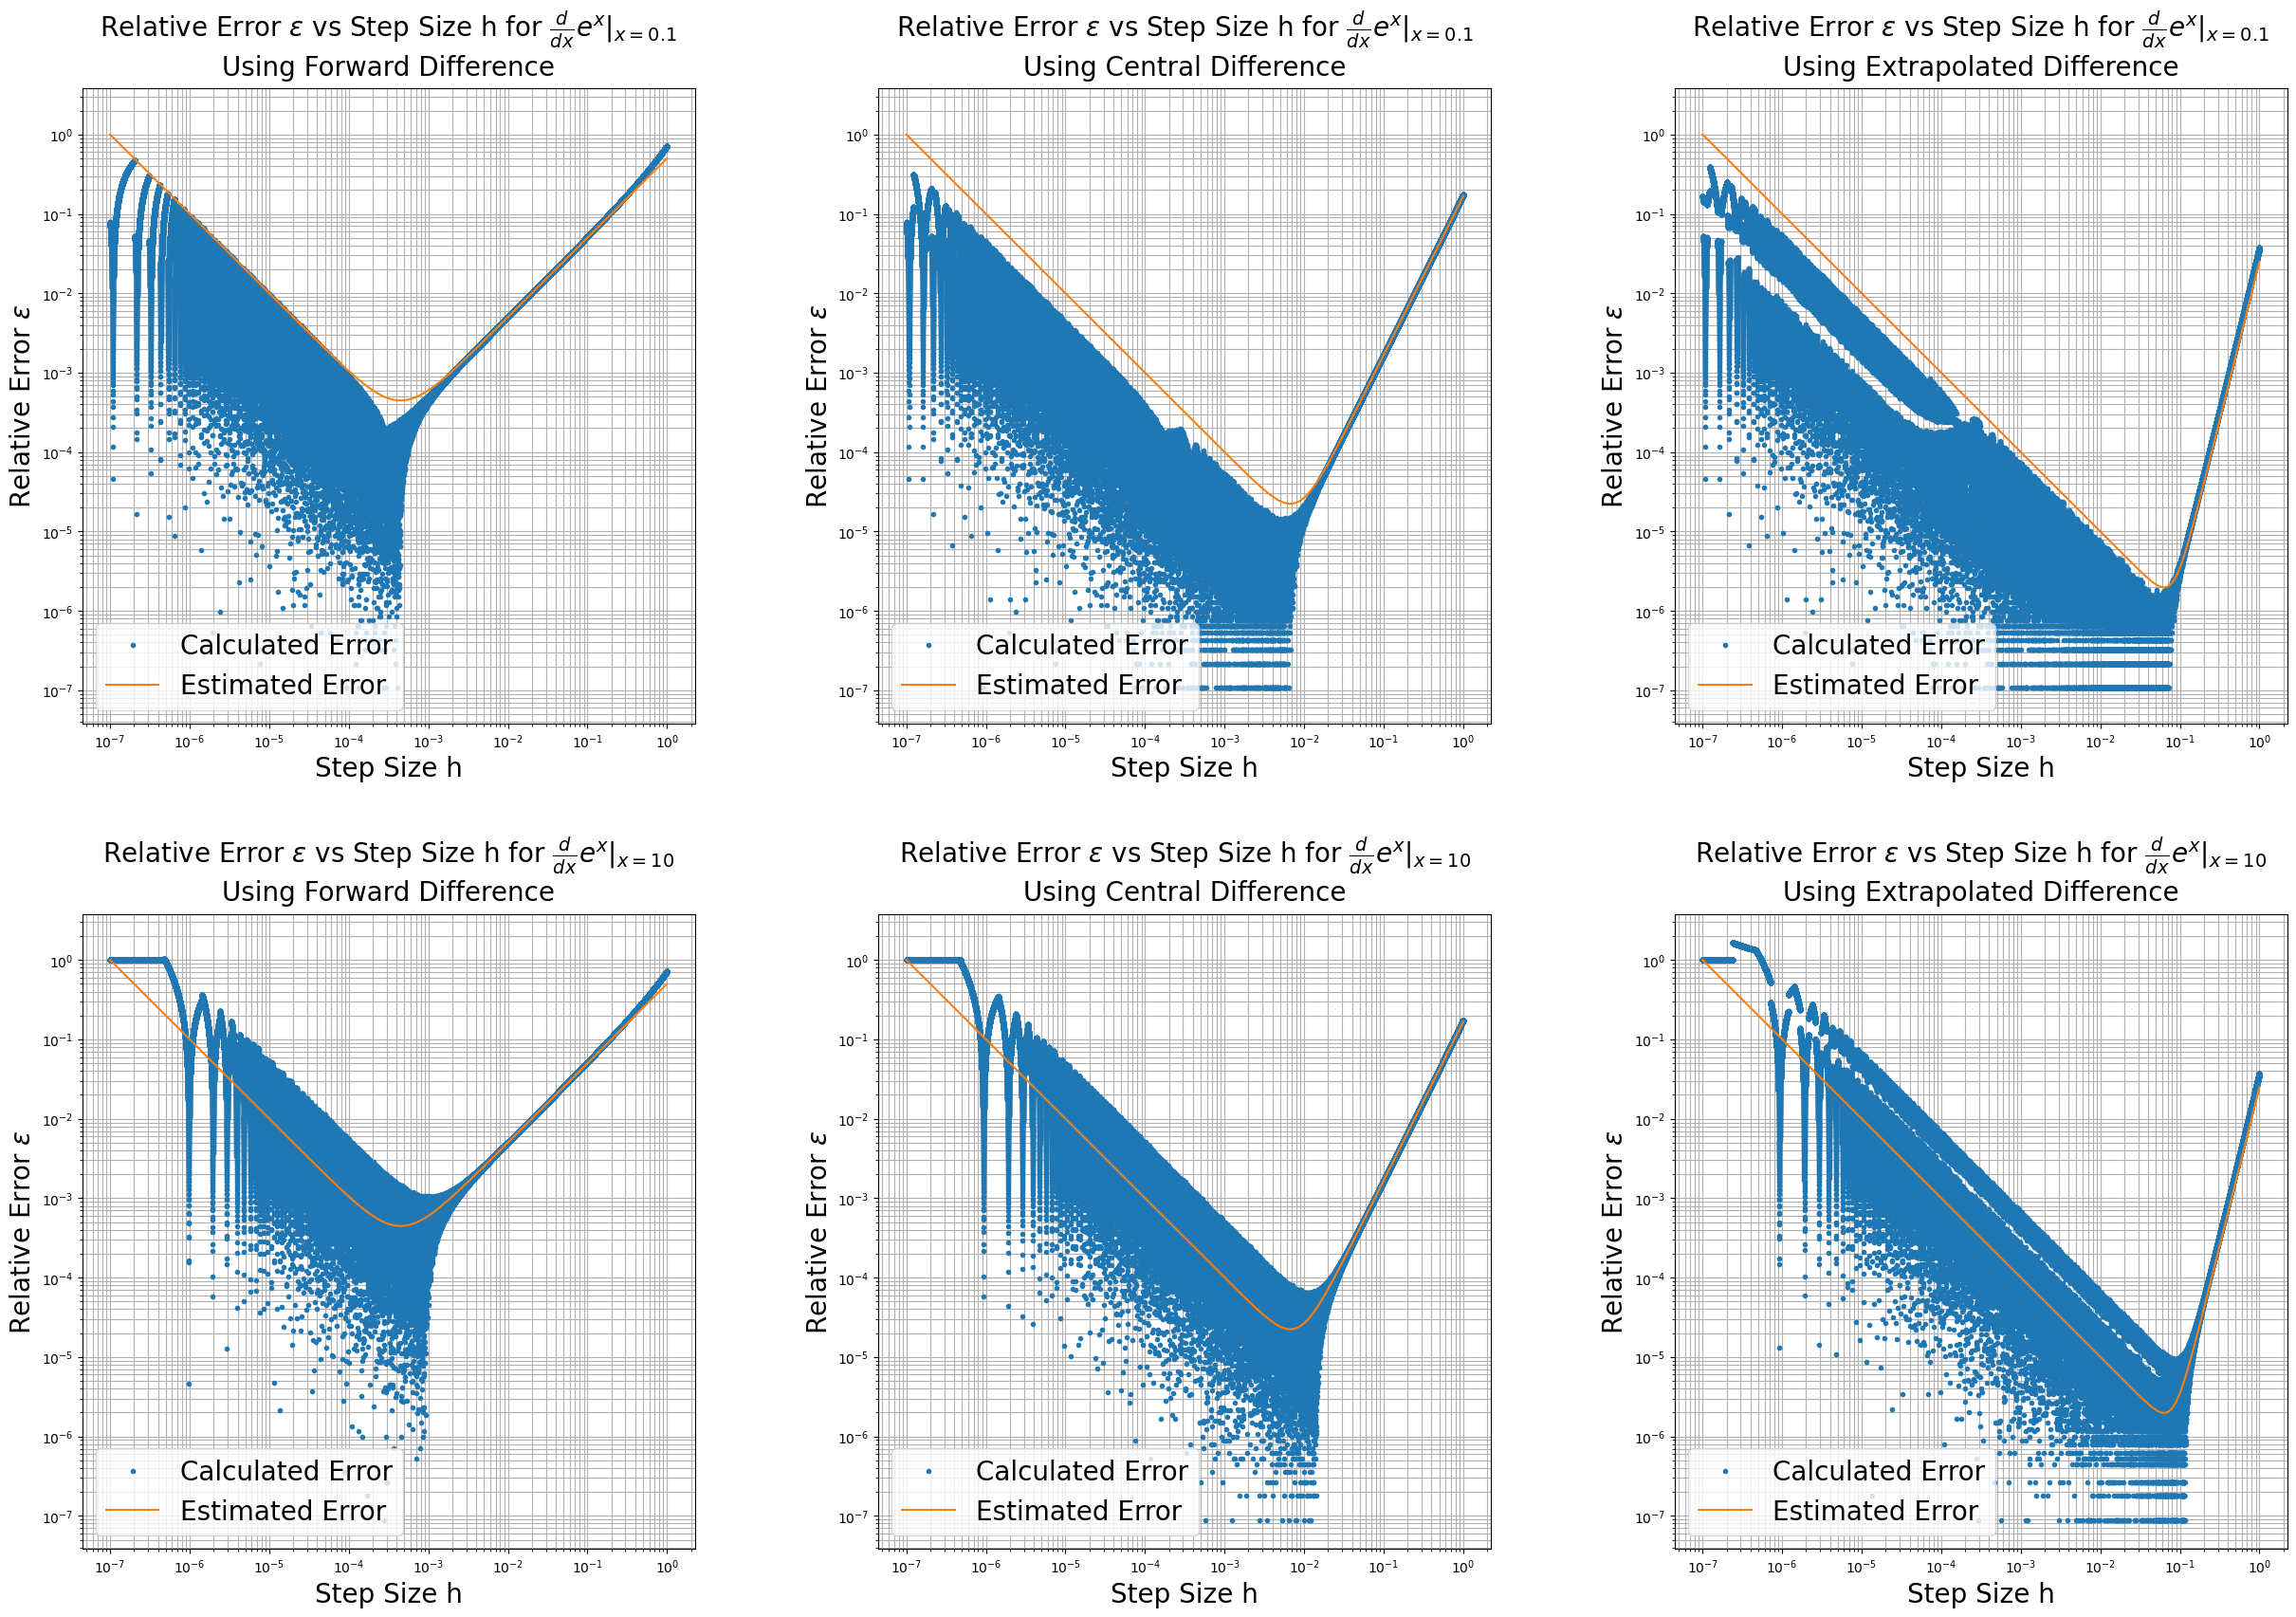

<Figure size 800x600 with 0 Axes>

In [7]:
fig, ax = plt.subplots(2,3,figsize=(30, 20),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.figure(figsize=(8,6),dpi=100)
ax[0][0].loglog(h_array,total_error_true(h_array, 0.1, 'exp', 'forward')/np.abs(np.exp(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][0].loglog(h_array,total_error(h_array, 0.1, 'exp', 'forward')/np.abs(np.exp(0.1,dtype=np.float32)),label='Estimated Error')
ax[0][0].grid(True,which='both')
ax[0][0].set_xlabel('Step Size h',fontsize=20)
ax[0][0].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[0][0].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} e^{x}|_{x=0.1}$'+ '\nUsing Forward Difference',fontsize=20,pad=10)
ax[0][0].legend(fontsize=20, loc='lower left')
ax[0][0].tick_params(labelbottom=True)
ax[0][0].tick_params(labelleft=True)

ax[0][1].loglog(h_array,total_error_true(h_array, 0.1, 'exp', 'central')/np.abs(np.exp(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][1].loglog(h_array,total_error(h_array, 0.1, 'exp', 'central')/np.abs(np.exp(0.1,dtype=np.float32)),label='Estimated Error')
ax[0][1].grid(True,which='both')
ax[0][1].set_xlabel('Step Size h',fontsize=20)
ax[0][1].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[0][1].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} e^{x}|_{x=0.1}$'+ '\nUsing Central Difference',fontsize=20,pad=10)
ax[0][1].legend(fontsize=20, loc='lower left')
ax[0][1].tick_params(labelbottom=True)
ax[0][1].tick_params(labelleft=True)

ax[0][2].loglog(h_array,total_error_true(h_array, 0.1, 'exp', 'extrapolated')/np.abs(np.exp(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][2].loglog(h_array,total_error(h_array, 0.1, 'exp', 'extrapolated')/np.abs(np.exp(0.1,dtype=np.float32)),label='Estimated Error')
ax[0][2].grid(True,which='both')
ax[0][2].set_xlabel('Step Size h',fontsize=20)
ax[0][2].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[0][2].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} e^{x}|_{x=0.1}$'+ '\nUsing Extrapolated Difference',fontsize=20,pad=10)
ax[0][2].legend(fontsize=20, loc='lower left')
ax[0][2].tick_params(labelbottom=True)
ax[0][2].tick_params(labelleft=True)

ax[1][0].loglog(h_array,total_error_true(h_array, 10, 'exp', 'forward')/np.abs(np.exp(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][0].loglog(h_array,total_error(h_array, 10, 'exp', 'forward')/np.abs(np.exp(10,dtype=np.float32)),label='Estimated Error')
ax[1][0].grid(True,which='both')
ax[1][0].set_xlabel('Step Size h',fontsize=20)
ax[1][0].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[1][0].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} e^{x}|_{x=10}$'+ '\nUsing Forward Difference',fontsize=20,pad=10)
ax[1][0].legend(fontsize=20, loc='lower left')
ax[1][0].tick_params(labelbottom=True)
ax[1][0].tick_params(labelleft=True)

ax[1][1].loglog(h_array,total_error_true(h_array, 10, 'exp', 'central')/np.abs(np.exp(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][1].loglog(h_array,total_error(h_array, 10, 'exp', 'central')/np.abs(np.exp(10,dtype=np.float32)),label='Estimated Error')
ax[1][1].grid(True,which='both')
ax[1][1].set_xlabel('Step Size h',fontsize=20)
ax[1][1].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[1][1].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} e^{x}|_{x=10}$'+ '\nUsing Central Difference',fontsize=20,pad=10)
ax[1][1].legend(fontsize=20, loc='lower left')
ax[1][1].tick_params(labelbottom=True)
ax[1][1].tick_params(labelleft=True)

ax[1][2].loglog(h_array,total_error_true(h_array, 10, 'exp', 'extrapolated')/np.abs(np.exp(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][2].loglog(h_array,total_error(h_array, 10, 'exp', 'extrapolated')/np.abs(np.exp(10,dtype=np.float32)),label='Estimated Error')
ax[1][2].grid(True,which='both')
ax[1][2].set_xlabel('Step Size h',fontsize=20)
ax[1][2].set_ylabel(r'Relative Error $\epsilon$',fontsize=20)
ax[1][2].set_title(r'Relative Error $\epsilon$ vs Step Size h for $\frac{d}{dx} e^{x}|_{x=10}$'+ '\nUsing Extrapolated Difference',fontsize=20,pad=10)
ax[1][2].legend(fontsize=20, loc='lower left')
ax[1][2].tick_params(labelbottom=True)
ax[1][2].tick_params(labelleft=True)